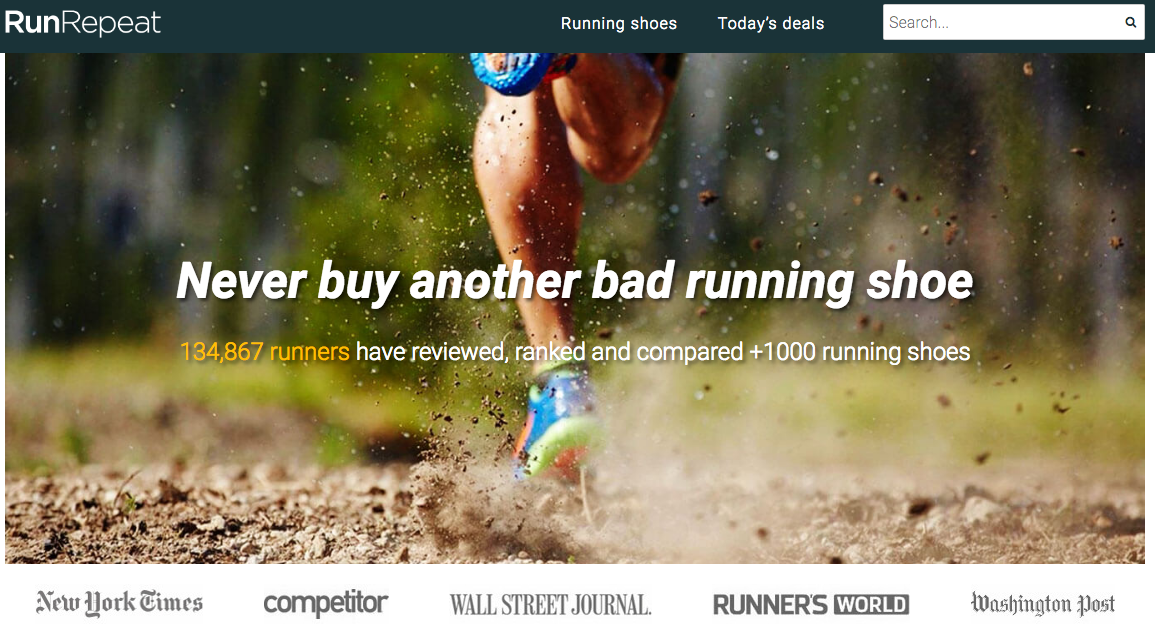

In [11]:
from IPython.display import Image
Image(filename='RunRepeat.png')

In [203]:
import numpy as np
import pandas as pd
runShoesDF = pd.read_csv("RRRShoes.csv")
runShoesDF.columns

Index([u'Company', u'ShoeURL', u'ShoeName', u'colorSize', u'TotalScore',
       u'TotalReviews', u'Discontinued', u'Terrain', u'Arch', u'Use', u'Price',
       u'DiscountPrice', u'Discount', u'ShoeWeight', u'ToeDrop', u'FootHeight',
       u'ReleaseDate', u'GoodSummary', u'BadSummary', u'Summary',
       u'RatingsText', u'USARanking', u'FiveStars', u'FourStars',
       u'ThreeStars', u'TwoStars', u'OneStars', u'ProdInfo', u'SizenFit',
       u'OuterSole', u'UpperSole'],
      dtype='object')

In [204]:
runShoesDF = runShoesDF.dropna(how='all')
runShoesDF.head(3)

,Company,ShoeURL,ShoeName,colorSize,TotalScore,TotalReviews,Discontinued,Terrain,Arch,Use,...,USARanking,FiveStars,FourStars,ThreeStars,TwoStars,OneStars,ProdInfo,SizenFit,OuterSole,UpperSole
1,Brooks,https://runrepeat.com/brooks-ghost-10,Brooks Ghost 10,9.0,97.0,133.0,N,Road,Neutral,Daily running,...,How popular is Brooks Ghost 10 in United State...,79.0,10.0,2.0,1.0,1.0,Brooks made it a point to reduce the weight of...,The Brooks Ghost 10 comes in standard shoe siz...,The outsole of the Brooks Ghost 10 is made up ...,The upper is made up of engineered mesh. It pr...
3,New Balance,https://runrepeat.com/new-balance-860-v7,New Balance 860 v7,5.0,95.0,56.0,N,Road,Stability,Daily running,...,How popular is New Balance 860 v7 in United St...,75.0,9.0,4.0,0.0,2.0,The New Balance 860 v7 features a few major up...,The shoe has a standard running shoe length. T...,The shoe utilizes a blown rubber compound that...,The New Balance 860 v7 features an engineered ...
5,Adidas,https://runrepeat.com/adidas-ultra-boost-uncaged,Adidas Ultra Boost Uncaged,12.0,96.0,665.0,N,Road,Stability,Daily running,...,How popular is Adidas Ultra Boost Uncaged in U...,82.0,12.0,2.0,1.0,1.0,Endless energy is given to the runner when the...,The Adidas Ultra Boost Uncaged uses standard m...,The STRETCHWEB outsole shields the rest of the...,The Primeknit is a material that feels like cl...


In [205]:
runShoesDF['Company'].unique()

array(['Brooks', 'New Balance', 'Adidas', 'Salomon', 'Puma', 'On', 'Nike',
       'Mizuno', 'Asics', 'Skechers', 'Merrell', 'Saucony', 'Inov-8',
       'Under Armour', 'Hoka One One', 'Altra', 'La Sportiva', 'Newton',
       'Vibram FiveFingers', 'Reebok', 'Dynafit'], dtype=object)

In [206]:
#Data preparation
runShoesDF['TotalScore'] = pd.to_numeric(runShoesDF['TotalScore'])
runShoesDF['TotalReviews'] = pd.to_numeric(runShoesDF['TotalScore'])
runShoesDF['RatingsText'] = pd.to_numeric(runShoesDF['RatingsText'])
runShoesDF['Discount'] = pd.to_numeric(runShoesDF['Discount'])

import re
def getRank(RankText):
    m = re.search('(#[0-9]{3}|#[0-9]{2}|#[0-9]{1})', RankText)
    if m==None:
        return ""
    else:
        s = m.group(1)
        return s[1:]

runShoesDF['Ranking'] = runShoesDF['USARanking'].apply(getRank)
runShoesDF['Ranking'] = pd.to_numeric(runShoesDF['Ranking'])
runShoesDF.head(3)

,Company,ShoeURL,ShoeName,colorSize,TotalScore,TotalReviews,Discontinued,Terrain,Arch,Use,...,FiveStars,FourStars,ThreeStars,TwoStars,OneStars,ProdInfo,SizenFit,OuterSole,UpperSole,Ranking
1,Brooks,https://runrepeat.com/brooks-ghost-10,Brooks Ghost 10,9.0,97.0,97.0,N,Road,Neutral,Daily running,...,79.0,10.0,2.0,1.0,1.0,Brooks made it a point to reduce the weight of...,The Brooks Ghost 10 comes in standard shoe siz...,The outsole of the Brooks Ghost 10 is made up ...,The upper is made up of engineered mesh. It pr...,12.0
3,New Balance,https://runrepeat.com/new-balance-860-v7,New Balance 860 v7,5.0,95.0,95.0,N,Road,Stability,Daily running,...,75.0,9.0,4.0,0.0,2.0,The New Balance 860 v7 features a few major up...,The shoe has a standard running shoe length. T...,The shoe utilizes a blown rubber compound that...,The New Balance 860 v7 features an engineered ...,37.0
5,Adidas,https://runrepeat.com/adidas-ultra-boost-uncaged,Adidas Ultra Boost Uncaged,12.0,96.0,96.0,N,Road,Stability,Daily running,...,82.0,12.0,2.0,1.0,1.0,Endless energy is given to the runner when the...,The Adidas Ultra Boost Uncaged uses standard m...,The STRETCHWEB outsole shields the rest of the...,The Primeknit is a material that feels like cl...,25.0


In [319]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import itertools

In [325]:
color = itertools.cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))

In [306]:
piePlotDF = runShoesDF.groupby('Company')['TotalScore'].mean().sort_values(ascending=False)

plt.pie(piePlotDF['TotalScore'],labels=piePlotDF['Company'], colors=None,
    # with one slide exploded out
    explode=None,
    # with the start angle at 90%
    startangle=90
    )
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.show()

KeyError: 'TotalScore'

In [315]:
piePlotDF = runShoesDF.groupby('Company')['TotalScore'].median().sort_values(ascending=False)
piePlotDF

Company
Vibram FiveFingers    89.0
Nike                  89.0
La Sportiva           89.0
Merrell               89.0
Adidas                89.0
Inov-8                88.0
Brooks                88.0
Under Armour          87.0
Saucony               87.0
Skechers              87.0
Hoka One One          87.0
Asics                 87.0
Puma                  86.0
Salomon               85.0
New Balance           85.0
On                    84.0
Newton                84.0
Altra                 84.0
Mizuno                82.5
Dynafit               81.0
Reebok                80.0
Name: TotalScore, dtype: float64

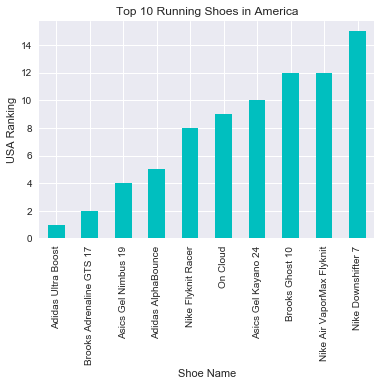

In [386]:
#runShoesDF['Ranking'].sort_values(ascending=True)
runShoesDF.groupby('ShoeName')['Ranking'].min().sort_values(ascending=True).head(10).plot.bar(color='c')
plt.ylabel('USA Ranking')
plt.xlabel('Shoe Name')
plt.title('Top 10 Running Shoes in America')

(70, 100)

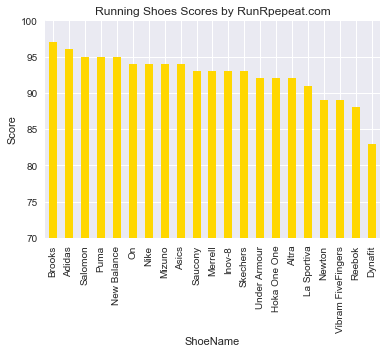

In [407]:
#runShoesDF['Ranking'].sort_values(ascending=True)
runShoesDF.groupby('Company')['TotalScore'].max().sort_values(ascending=False).plot.bar(color="gold")
plt.ylabel('Score')
plt.xlabel('Company Name')
plt.title('Running Shoes Scores by RunRpepeat.com')
plt.ylim(70,100)
runShoesDF[['ShoeName','TotalScore']].head(15)
#.plot.bar(color="b")
plt.ylabel('Score')
plt.xlabel('ShoeName')
#plt.title('TOP 15 Running Shoes Scores ')
plt.ylim(70,100)

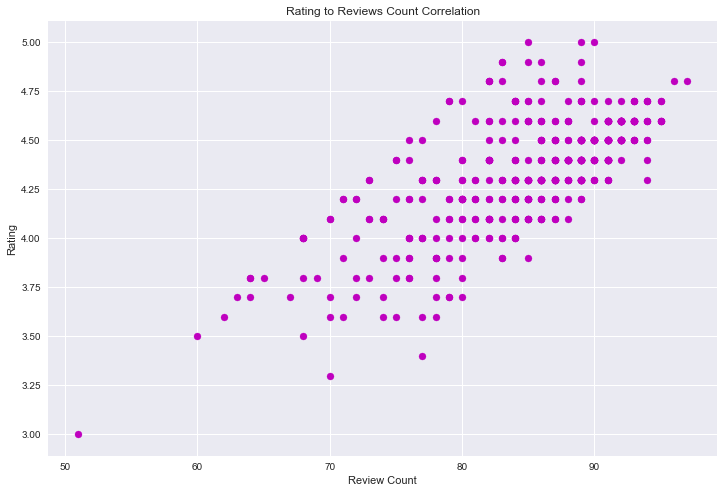

In [351]:
plt.figure(figsize=(12,8))
plt.scatter(runShoesDF['TotalReviews'],runShoesDF['RatingsText'],marker='o',c='m')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.title('Rating to Reviews Count Correlation')

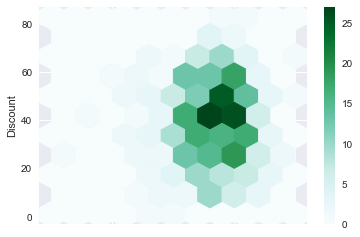

In [344]:
#plt.scatter(runShoesDF['RatingsText'],runShoesDF['Discount'])
runShoesDF.plot.hexbin('RatingsText','Discount', reduce_C_function=np.max, gridsize=10)

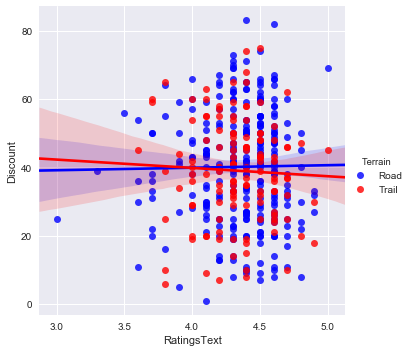

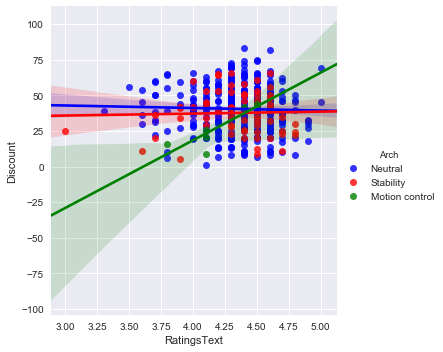

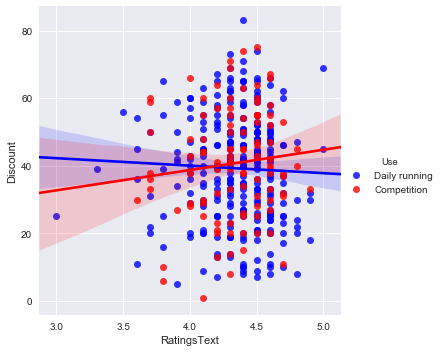

In [381]:
#plt.scatter(runShoesDF['RatingsText'],runShoesDF['Discount'])
import seaborn as sns
sns.lmplot("RatingsText","Discount",data=runShoesDF,hue="Terrain", palette={"Road":"b","Trail":"r"})
sns.lmplot("RatingsText","Discount",data=runShoesDF,hue="Arch", palette={"Neutral":"b","Stability":"r","Motion control":"g"})
sns.lmplot("RatingsText","Discount",data=runShoesDF,hue="Use", palette={"Daily running":"b","Competition":"r"})


KeyError: 'TotalRviews'

In [391]:
import urllib2
import re
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts

ImportError: No module named pytagcloud

In [ ]:

TEXT = '''I am trying to create a word cloud in python. With my current cloud, I can generate a cloud, but the words all are the same size. How can I alter the code so that my words' sizes appear in relation to their frequency?'''

counts = get_tag_counts(TEXT)
tags = make_tags(counts, maxsize=120)
create_tag_image(tags, 'cloud_large.png', size=(900, 600), fontname='Lobster')

{"probability": {"neg": 0.81178592977934505, "neutral": 0.13959399822658816, "pos": 0.18821407022065501}, "label": "neg"}
